# Лабораториска Вежба 3
## Ненадгледувано учење

### Вчитување на податочното множество

Податочното множество може да се вчита од следниот линк:
http://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

In [108]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

In [58]:
data = pd.read_excel('/content/drive/MyDrive/MU/lab3/Data_Cortex_Nuclear.xls')
data

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [59]:
print("Број на податоци (N) =", len(data))

Број на податоци (N) = 1080


In [60]:
print("Број на атрибути (D) =", len(data.columns))

Број на атрибути (D) = 82


In [61]:
# Таргет колона
Y = data['class']
Y

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
         ...  
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1080, dtype: object

In [62]:
data.drop(['MouseID', 'Genotype', 'Treatment',	'Behavior', 'class'], inplace=True, axis=1)

In [63]:
len(data.columns)

77

In [64]:
data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


### Запознавање со податочното множество

In [65]:
data.isnull().sum()

DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
SYP_N          0
H3AcK18_N    180
EGR1_N       210
H3MeK4_N     270
CaNA_N         0
Length: 77, dtype: int64

In [66]:
data.dropna(inplace=True)

In [67]:
scaled_data = StandardScaler().fit_transform(data)

## Визуелизирање со PCA

In [68]:
print("Број на класи = ", len(Y.value_counts()))

Број на класи =  8


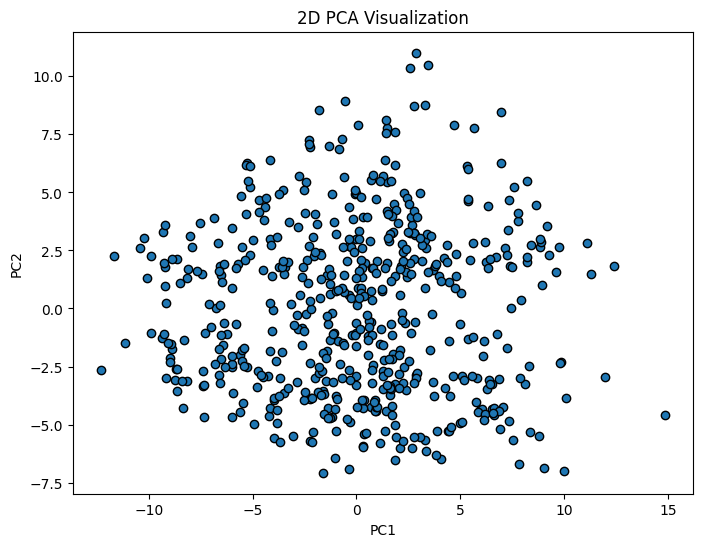

In [117]:
# 2D Визуелизација
pca = PCA(n_components=3)
components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Visualization')
plt.show()

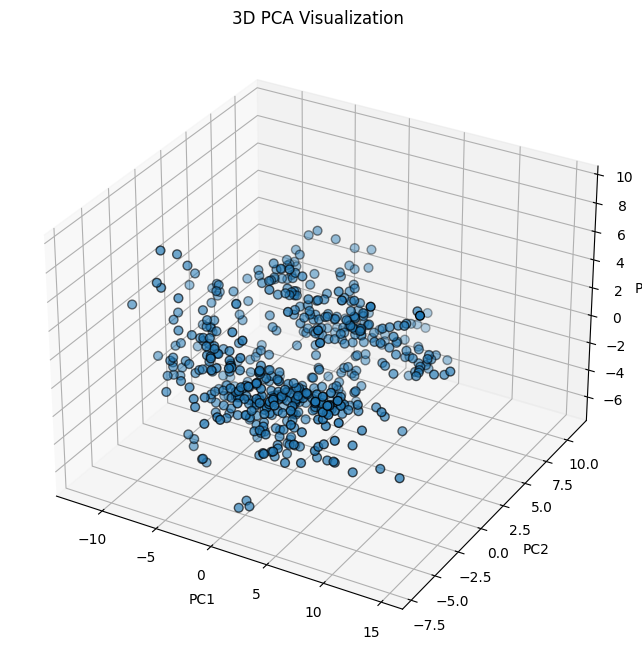

In [116]:
# 3D Визуелизација
fig = plt.figure(figsize=(10, 8))
plot = fig.add_subplot(111, projection='3d')

plot.scatter(components[:, 0], components[:, 1], components[:, 2], edgecolor='k', s=40)
plot.set_xlabel('PC1')
plot.set_ylabel('PC2')
plot.set_zlabel('PC3')
plot.set_title('3D PCA Visualization')
plt.show()

## Кластерирање

### K-Means

Elbow Method за да се добие оптималниот број на кластери

In [71]:
k_values = range(1, 11)
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

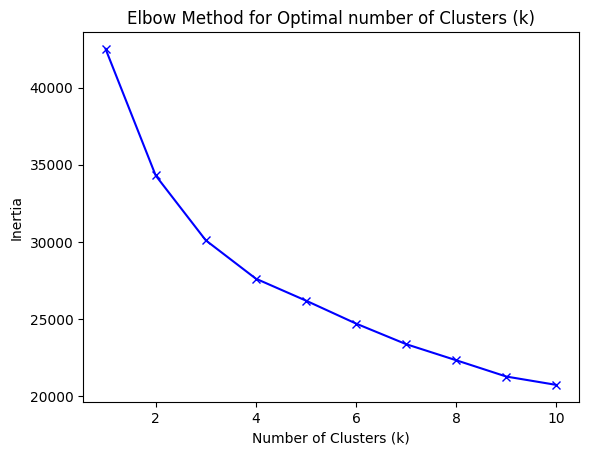

In [72]:
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal number of Clusters (k)')
plt.show()

Го избирам бројот **5** како оптимален број на кластери.

<font color="orange">t-SNE (t-Distributed Stochastic Neighbor Embedding)</font> го користам за намалување на димензионалноста пред да се кластерираат податоците.

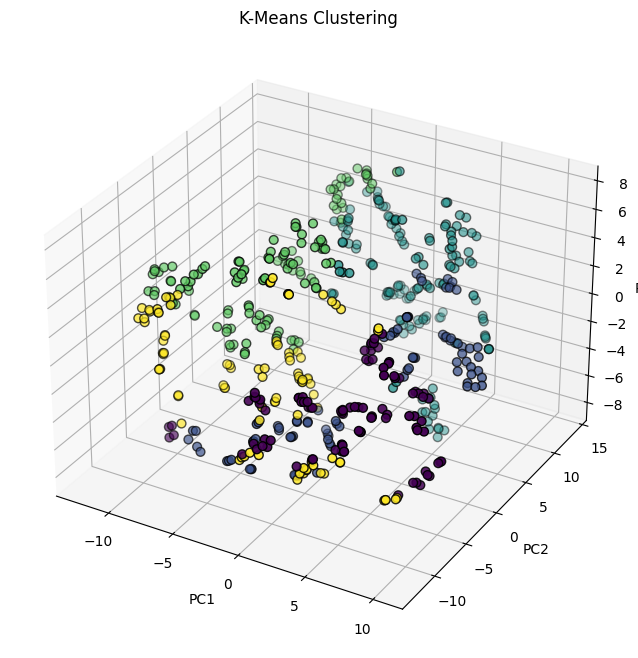

In [135]:
kmeans = KMeans(n_clusters=5, n_init='auto').fit(scaled_data)
predictions = kmeans.predict(scaled_data)

tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(scaled_data)

fig = plt.figure(figsize=(10, 8))
plot = fig.add_subplot(111, projection='3d')

plot.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    X_tsne[:, 2],
    c=predictions,
    edgecolor='k',
    s=40,
    cmap='viridis'
)

plot.set_xlabel('PC1')
plot.set_ylabel('PC2')
plot.set_zlabel('PC3')
plot.set_title('K-Means Clustering')

plt.show()

### Gaussian Mixture Model

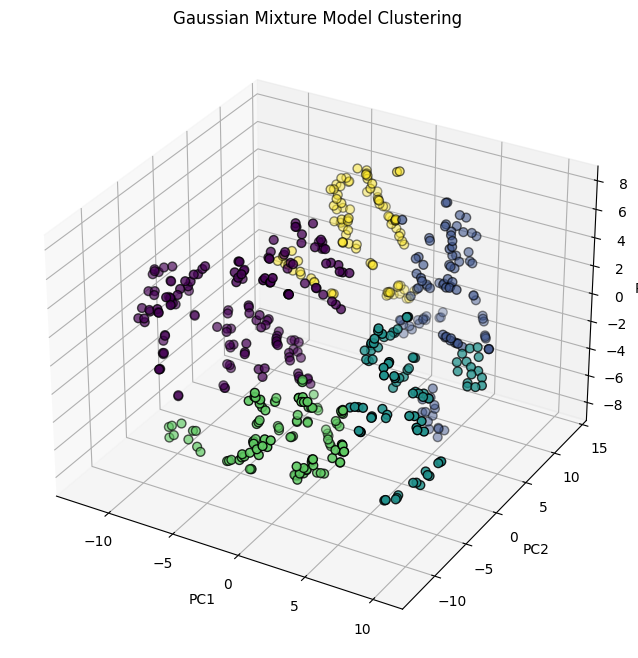

In [136]:
gmm = GaussianMixture(n_components=5).fit(X_tsne)
predictions = gmm.predict(X_tsne)

fig = plt.figure(figsize=(10, 8))
plot = fig.add_subplot(111, projection='3d')

plot.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    X_tsne[:, 2],
    c=predictions,
    edgecolor='k',
    s=40,
    cmap='viridis'
)

plot.set_xlabel('PC1')
plot.set_ylabel('PC2')
plot.set_zlabel('PC3')
plot.set_title('Gaussian Mixture Model Clustering')

plt.show()

## Заклучок
Бидејќи бројот на атрибути за секој примерок е голем, искористив t-SNE за да ја намалам димензионалноста на податоците. <br>
Го искористив Elbow Method за да го одредам бројот на кластерите и го избрав да биде 5. <br>
Потоа ги кластерирав користејќи ги моделите <font color="orange">K-Means и Gaussian Mixture Models.</font> <br>
Според визуелниот приказ на моделите може да се види дека Gaussian Mixture Model ги кластерира податоците подобро и прави подобра разлика меѓу нив.
